# 1 - Exploration des données

In [22]:
# importation des données

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")

## 1.1 - Chargement des données et visualisation du format des données

In [23]:
# Données d'entrainement
# Ajoutons des noms de colonnes aux données
columns = ['age', 'classmetier', 'fnlwgt', 'education', 'education-rang', 'status-marital', 'occupation',
          'relation', 'race', 'genre', 'gain-surcapital', 'perte-surcapital', 'heure-parsemaine', 'pays-origine', 'salaire']

# Lecture des données d'entrainement
adult_train = pd.read_csv('adult.data', header=None, names=columns, skipinitialspace=True)

# Suppression de la colonne sur le poids fnlwgt non utilisé dans les analyses à suivre
adult_train = adult_train.drop('fnlwgt', axis=1)

# Affichage de lignes et dimensions du jeux d'entrainements
display(adult_train.head())
display(adult_train.shape)

,age,classmetier,education,education-rang,status-marital,occupation,relation,race,genre,gain-surcapital,perte-surcapital,heure-parsemaine,pays-origine,salaire
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 14)

## 1.2 - Données de test

In [24]:
# Données d'entrainement
# Ajoutons des noms de colonnes aux données
columns = ['age', 'classmetier', 'fnlwgt', 'education', 'education-rang', 'status-marital', 'occupation',
          'relation', 'race', 'genre', 'gain-surcapital', 'perte-surcapital', 'heure-parsemaine', 'pays-origine', 'salaire']

# Lecture des données d'entrainement
adult_test = pd.read_csv('adult.test', header=None, names=columns, skipinitialspace=True, skiprows=1)

# Suppression de la colonne sur le poids fnlwgt non utilisé dans les analyses à suivre
adult_test = adult_test.drop('fnlwgt', axis=1)

# Enlever le '.' de la colonne salaire
adult_test['salaire'] = adult_test['salaire'].apply(lambda x: '>50K' if x == '>50K.' else '<=50K')
 
# Affichage de lignes et dimensions du jeux d'entrainements
display(adult_train.head())
display(adult_train.shape)

,age,classmetier,education,education-rang,status-marital,occupation,relation,race,genre,gain-surcapital,perte-surcapital,heure-parsemaine,pays-origine,salaire
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 14)

## 1.3 - Evaluation des données manquantes

In [25]:
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   classmetier       32561 non-null  object
 2   education         32561 non-null  object
 3   education-rang    32561 non-null  int64 
 4   status-marital    32561 non-null  object
 5   occupation        32561 non-null  object
 6   relation          32561 non-null  object
 7   race              32561 non-null  object
 8   genre             32561 non-null  object
 9   gain-surcapital   32561 non-null  int64 
 10  perte-surcapital  32561 non-null  int64 
 11  heure-parsemaine  32561 non-null  int64 
 12  pays-origine      32561 non-null  object
 13  salaire           32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


### 1.3.1 - Traitement des données incohérentes/manquantes

In [26]:
# Vérifier la présence du code de valeurs manquantes et convertir en NaNs
# Object récupère les colonnes dont les types objets sont renseignés comme valeurs '?'

object_col = adult_train.select_dtypes(include=object).columns.tolist() 
for col in object_col:
    display(adult_train[col].value_counts(dropna=False)/adult_train.shape[0]) 

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: classmetier, dtype: float64

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: status-marital, dtype: float64

Prof-specialty       0.127146
Craft-repair         0.125887
Exec-managerial      0.124873
Adm-clerical         0.115783
Sales                0.112097
Other-service        0.101195
Machine-op-inspct    0.061485
?                    0.056601
Transport-moving     0.049046
Handlers-cleaners    0.042075
Farming-fishing      0.030527
Tech-support         0.028500
Protective-serv      0.019932
Priv-house-serv      0.004576
Armed-Forces         0.000276
Name: occupation, dtype: float64

Husband           0.405178
Not-in-family     0.255060
Own-child         0.155646
Unmarried         0.105832
Wife              0.048156
Other-relative    0.030128
Name: relation, dtype: float64

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: race, dtype: float64

Male      0.669205
Female    0.330795
Name: genre, dtype: float64

United-States                 0.895857
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

<=50K    0.75919
>50K     0.24081
Name: salaire, dtype: float64

In [27]:
# Convertir '?' en NaNs et les supprimer
for col in object_col:
    adult_train.loc[adult_train[col]=='?', col] = np.nan
    adult_test.loc[adult_test[col]=='?', col] = np.nan
    
# Evaluer le taux de données manquantes dans le dataset
col_missing_pct = adult_train.isna().sum()/adult_train.shape[0]
col_missing_pct.sort_values(ascending=False)

occupation          0.056601
classmetier         0.056386
pays-origine        0.017905
age                 0.000000
education           0.000000
education-rang      0.000000
status-marital      0.000000
relation            0.000000
race                0.000000
genre               0.000000
gain-surcapital     0.000000
perte-surcapital    0.000000
heure-parsemaine    0.000000
salaire             0.000000
dtype: float64

In [28]:
# Suppression des entrées des données à valeurs manquantes
adult_train = adult_train.dropna(axis=0, how='any')
adult_test = adult_test.dropna(axis=0, how='any')

# Affichage des valeurs pour les jeux de données manquantes
print("Après suppression des valeurs manquantes: ")
print("Le jeu d'entrainement a {} instances".format(adult_train.shape[0]))
print("Le jeu de test a {} instances".format(adult_test.shape[0]))

Après suppression des valeurs manquantes: 
Le jeu d'entrainement a 30162 instances
Le jeu de test a 15060 instances


## 1.4 - Revue des données

In [29]:
# Combinons les jeux de données
adult_data = pd.concat([adult_train, adult_test])

In [30]:
# Total du nombre des entrées
n_records = adult_data.shape[0]

# Nombre des entrées où les idividus ont un salaire supérieure à $50,000
n_greater_50k = np.sum(adult_data.salaire == '>50K')

# Nombre des entrées où les individus ont un salaire inférieur à $50,000
n_at_most_50k = np.sum(adult_data.salaire == '<=50K')

# Pourcentage d'individus avec un salaire de plus de $50,000
greater_percentage = round(np.mean(adult_data.salaire == '>50K') * 100.00, 2)

# Afficher les résultas
print("Total du nombre des entrées: {}".format(n_records))
print("Individus ayant plus de $50,000 de salaire: {}".format(n_greater_50k))
print("Individus ayant au plus $50,000 de salaire : {}".format(n_at_most_50k))
print("Pourcentage d'individus avec un salaire de plus de $50,000: {}%".format(greater_percentage))

Total du nombre des entrées: 45222
Individus ayant plus de $50,000 de salaire: 11208
Individus ayant au plus $50,000 de salaire : 34014
Pourcentage d'individus avec un salaire de plus de $50,000: 24.78%


# 2 - Préparation des données

### 2.0.1 - Transformer des données continues asymétriques (skewness)

/tmp/ipykernel_3832/1135692925.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


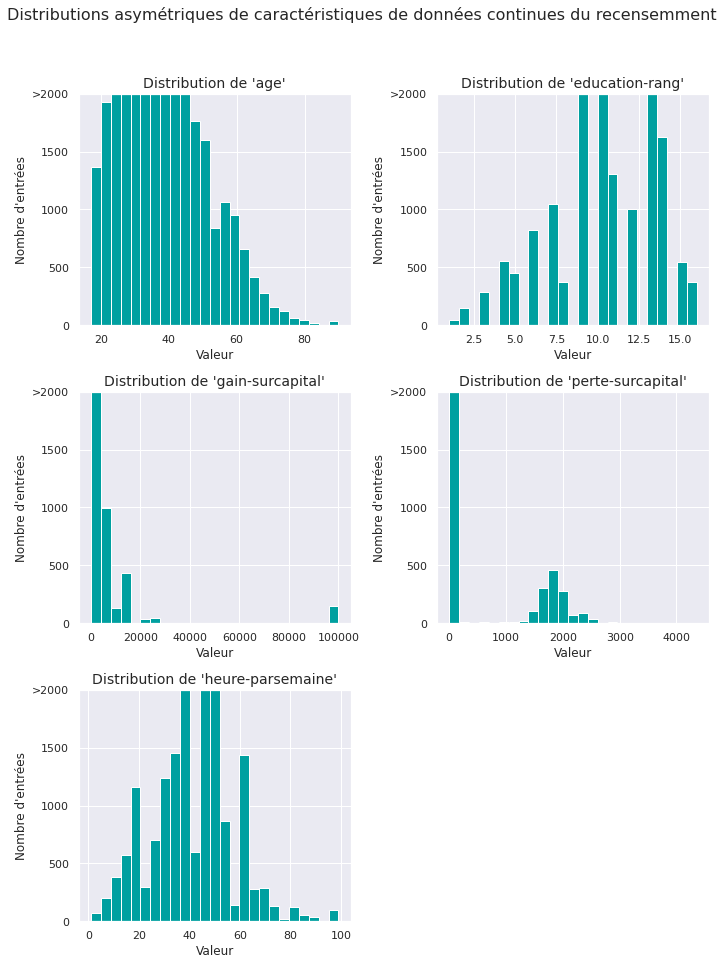

In [31]:
# Vérifier l'asymétrie des données numériques dans le jeu de données
num_col = adult_train.dtypes[adult_train.dtypes != 'object'].index

# Création de la figure
fig = plt.figure(figsize=(10, 13))

# Affichage de l'asymétrie des données
for i, feature in enumerate(adult_train[num_col]):
    ax = fig.add_subplot(3, 2, i+1)
    ax.hist(adult_train[feature], bins = 25, color = '#00A0A0')
    ax.set_title("Distribution de '%s'"%(feature), fontsize = 14)
    ax.set_xlabel("Valeur")
    ax.set_ylabel("Nombre d'entrées")
    ax.set_ylim((0, 2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

# Tracé aesthetics
fig.suptitle("Distributions asymétriques de caractéristiques de données continues du recensemment", fontsize = 16, y = 1.03)

fig.tight_layout()
fig.show()

In [32]:
# Calucul de l'asymétrie et ordonancer
skew_feats = adult_train[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'skew': skew_feats})
skewness

,skew
gain-surcapital,11.902682
perte-surcapital,4.526380
age,0.530228
heure-parsemaine,0.330869
education-rang,-0.305379


In [33]:
# Scinder les données en entrées(caratéristiques) et sorties (cible)
salaire_brut = adult_train['salaire']
carateristiques_brut = adult_train.drop('salaire', axis=1)

salaire_brut_test = adult_test['salaire']
carateristiques_brut_test = adult_test.drop('salaire', axis=1)
#display(carateristiques_brut)

# Log tranformation des cractéristiques fortement asymétriques 'gain-surcapital', 'perte-surcapital'
skewed = ['gain-surcapital', 'perte-surcapital']

features_log_transformed = pd.DataFrame(data=carateristiques_brut)
features_log_transformed[skewed] = carateristiques_brut[skewed].apply(lambda x: np.log(x + 1))

features_log_transformed_test = pd.DataFrame(data=carateristiques_brut_test)
features_log_transformed_test[skewed] = carateristiques_brut_test[skewed].apply(lambda x: np.log(x + 1))

### 2.0.2 - Normalisation des caractéristiques numériques

In [34]:
from time import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [42]:
# Initialiser un scaler, à appliquer aux caractéristiques
scaler = MinMaxScaler()

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_col] = scaler.fit_transform(features_log_transformed[num_col])

# Meme chose pour les doonnées de tests
features_log_minmax_transform_test = pd.DataFrame(data = features_log_transformed_test)
features_log_minmax_transform_test[num_col] = scaler.transform(features_log_transformed_test[num_col])

# Affichage d'une instance de données mis à l'échelle
display(features_log_minmax_transform.head())

AssertionError: Gaps in blk ref_locs

In [ ]:
scaler?